In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")
volume_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="volume")

In [5]:
import performance as perf
import utils 
import tears
import plotting

In [6]:
def zscore_normalize_by_row(df):
    """
    对DataFrame按行进行Z-score标准化。

    参数:
    df : DataFrame
        输入的DataFrame。

    返回:
    normalized_df : DataFrame
        按行标准化后的DataFrame。
    """
    # 计算每一行的均值和标准差
    row_means = df.mean(axis=1)
    row_std_devs = df.std(axis=1)
    
    # 对每一行进行Z-score标准化
    normalized_df = ((df.T - row_means) / row_std_devs).T
    
    return normalized_df

In [7]:
alpha_009 = (zscore_normalize_by_row(volume_df.rolling(20).mean()) + zscore_normalize_by_row(volume_df.rolling(20).std())).shift(1)

In [10]:
ftr_stack = utils.get_clean_factor_and_forward_returns(alpha_009, close_df, quantiles=10, periods=(5,10,20))

Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,-0.043,-0.051,-0.064
IC Std.,0.125,0.125,0.120
IC_IR,-0.348,-0.409,-0.530
t-stat(IC),-12.317,-14.472,-18.779
p-value(IC),0.000,0.000,0.000
IC Skew,0.079,0.101,0.232
IC Kurtosis,-0.106,0.057,-0.358


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.124,0.210,0.333
Quantile 2 Mean Turnover,0.282,0.445,0.632
Quantile 3 Mean Turnover,0.351,0.532,0.717
Quantile 4 Mean Turnover,0.385,0.573,0.753
Quantile 5 Mean Turnover,0.398,0.587,0.768
Quantile 6 Mean Turnover,0.398,0.588,0.770
Quantile 7 Mean Turnover,0.384,0.574,0.763
Quantile 8 Mean Turnover,0.349,0.536,0.734
Quantile 9 Mean Turnover,0.279,0.449,0.654
Quantile 10 Mean Turnover,0.120,0.215,0.364


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.972,0.934,0.858


<Figure size 640x480 with 0 Axes>

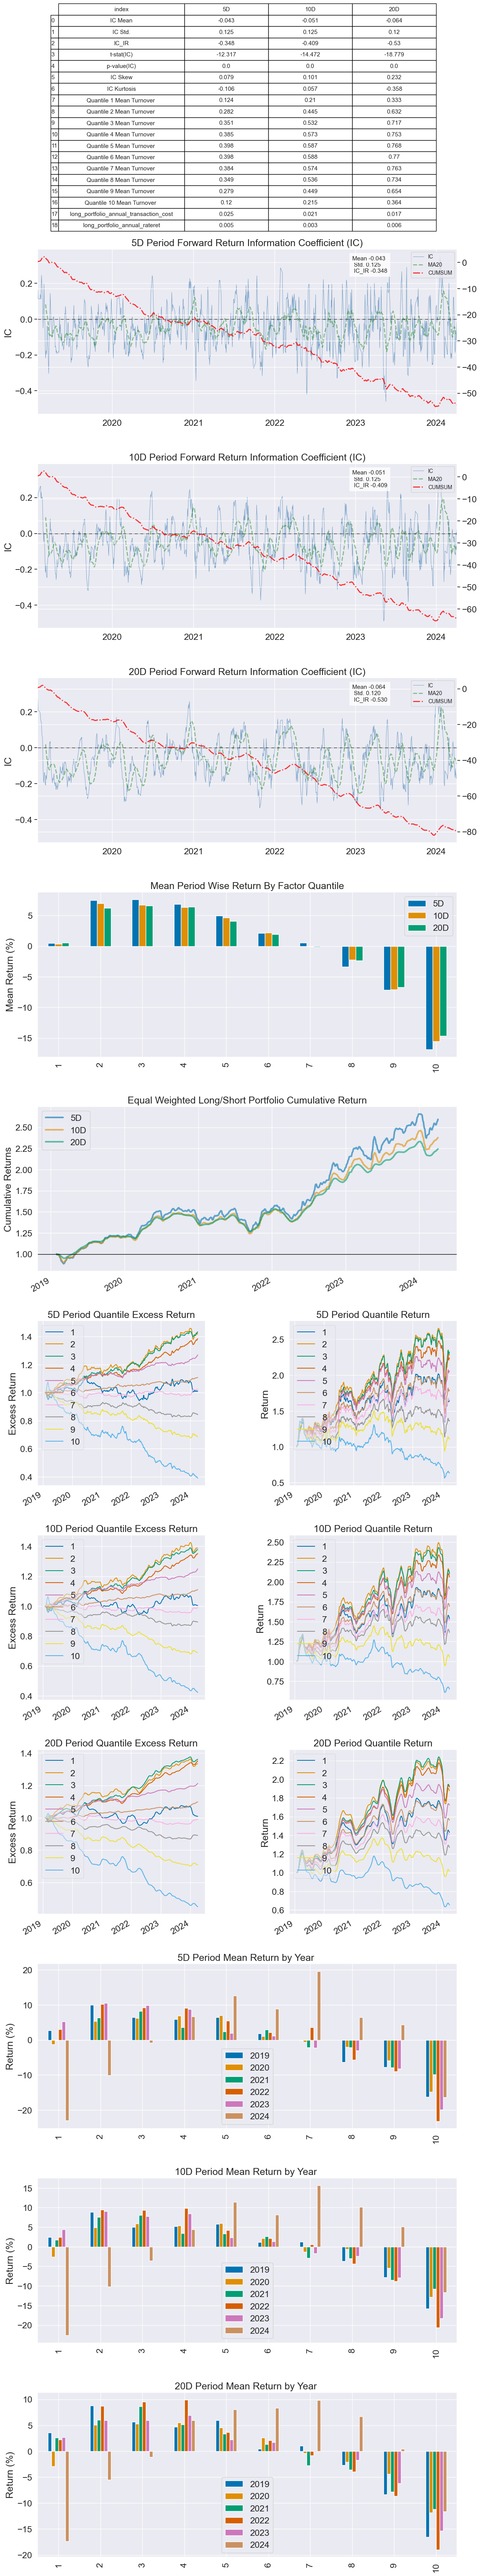

In [11]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./alpha_009/")